In [105]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler, Normalizer

df = pd.read_csv('D:\\Projects\\kaggle_space_titanic\\data\\train.csv')
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


__Data Field Descriptions__
- __PassengerId__ - Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
- __HomePlanet__ - The planet the passenger departed from, typically their planet of permanent residence.
- __CryoSleep__ - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- __Cabin__ - Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- __Destination__ - The planet the passenger will be debarking to.
- __Age__ - The age of the passenger.
- __VIP__ - Whether the passenger has paid for special VIP service during the voyage.
- __RoomService__, __FoodCourt__, __ShoppingMall__, __Spa__, __VRDeck__ - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- __Name__ - The first and last names of the passenger.
- __Transported__ - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [106]:
split_cabin_array = []
for row in df.Cabin:
    if pd.isnull(row):
        split_cabin_array.append([np.nan, np.nan, np.nan])
    else:
        split_cabin_array.append(row.split('/'))

split_cabin_df = pd.DataFrame(split_cabin_array, columns=['CabinDeck', 'CabinNum', 'CabinSide'])
df = pd.merge(left=df, right=split_cabin_df, left_index=True, right_index=True)
df['CabinNum'] = pd.to_numeric(df['CabinNum'], errors='coerce')
df['CabinNum'] = df['CabinNum'].astype(int, errors='ignore')

In [107]:
# transform categorical columns to onehot
cat_col = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
for i, col in enumerate(cat_col):
    temp_d = pd.get_dummies(df[col], prefix=col)
    df = pd.merge(left=df, right=temp_d, left_index=True, right_index=True)
    df = df.drop(columns=col)

# transform boolean to binary
bool_col = ['CryoSleep', 'VIP', 'Transported']
df[bool_col] = df[bool_col].replace(True, 1)
df[bool_col] = df[bool_col].replace(False, 0)
#df[bool_col] *= 1

# 0 to -1
binary_cols = ['CryoSleep', 'VIP', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinSide_P', 'CabinSide_S']
#df[binary_cols] = df[binary_cols].replace(0, -1)

In [108]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'CabinNum', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinSide_P', 'CabinSide_S'],
      dtype='object')

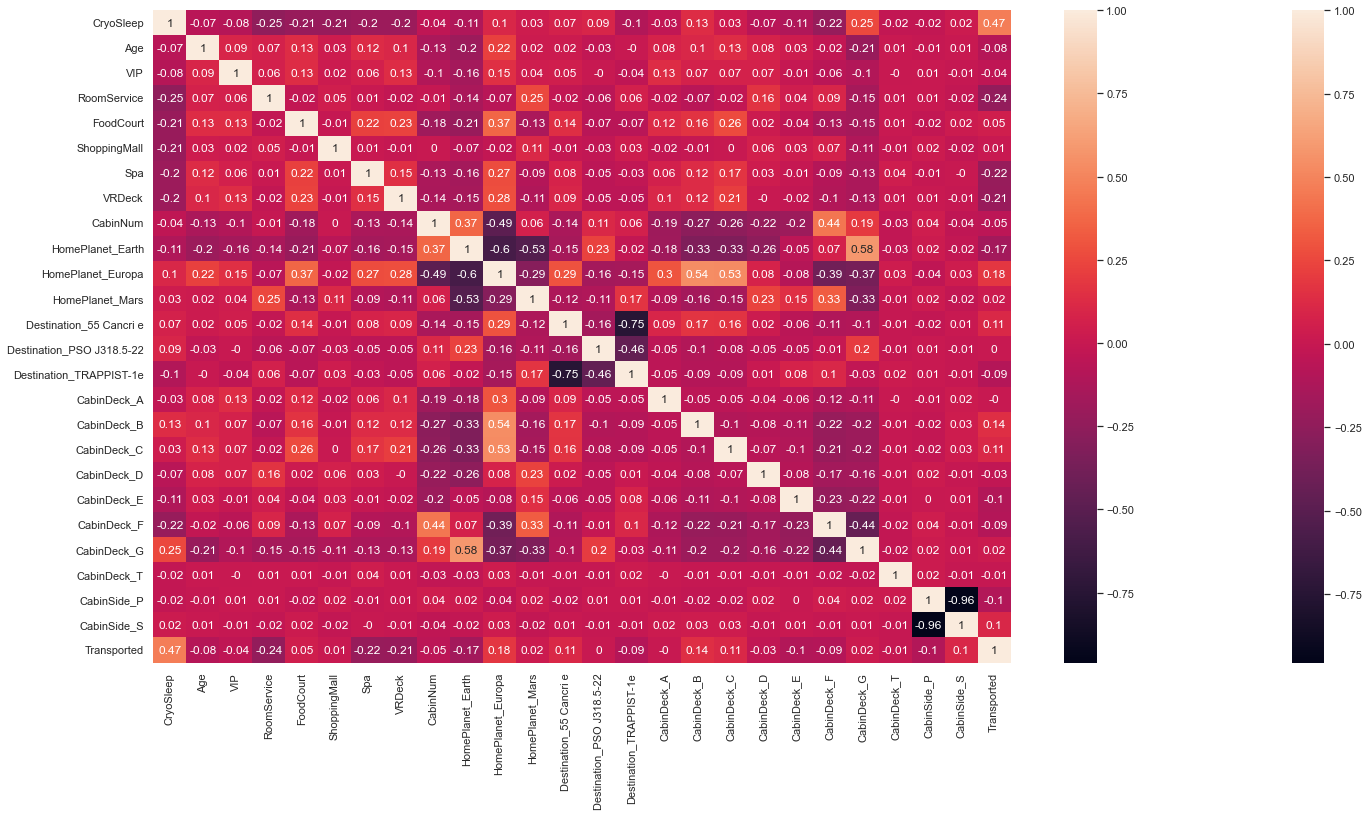

"\ncovMatrix = df[interesting_col].cov().round(2)\nsn.set(rc = {'figure.figsize':(24,12)})\nsn.heatmap(df.cov())\nsn.heatmap(covMatrix, annot=True, fmt='g')\nplt.show()\n"

In [109]:
interesting_col = ['CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CabinNum', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinSide_P', 'CabinSide_S', 'Transported']
corrMatrix = df[interesting_col].corr().round(2)
sn.set(rc = {'figure.figsize':(24,12)})
sn.heatmap(df.corr())
sn.heatmap(corrMatrix, annot=True)
plt.show()
'''
covMatrix = df[interesting_col].cov().round(2)
sn.set(rc = {'figure.figsize':(24,12)})
sn.heatmap(df.cov())
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()
'''

Variables To Use: Cryosleep, RoomService, Spa, VRDeck, HomePlanet_Earth, HomePlanet_Europa, Destination_55 Cancri e, 'Destination_TRAPPIST-1e', CabinSide_S

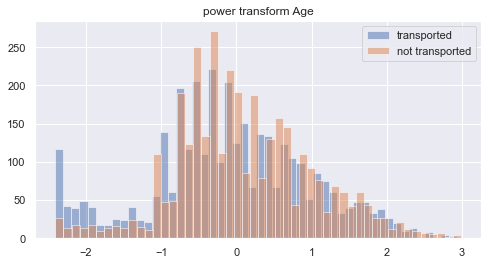

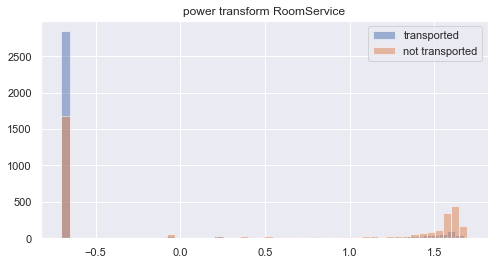

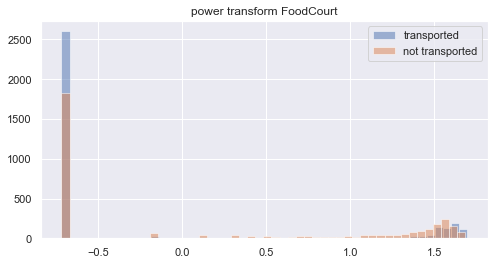

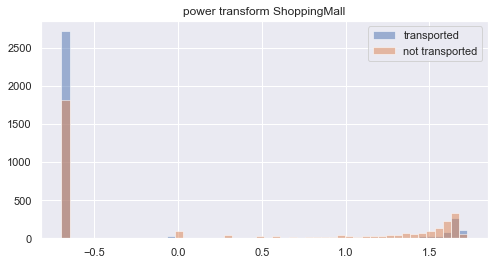

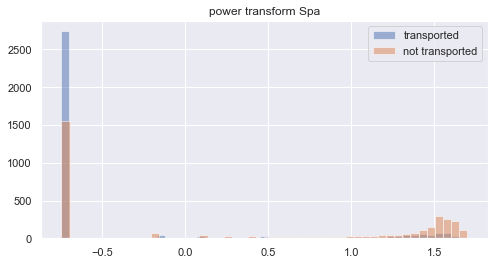

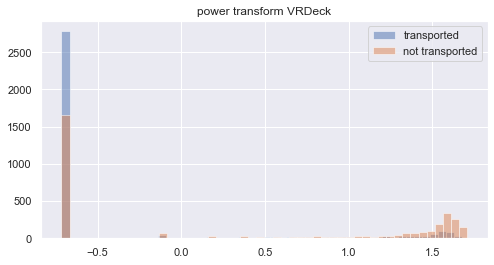

In [110]:
# not many missing variables so just remove rows with na
df = df.dropna()

sn.set(rc = {'figure.figsize':(8,4)})

bins = 50
a = .5
float_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for c in float_cols:
    scaler = PowerTransformer()
    data = np.array(df[c]).reshape(-1, 1)
    scaler.fit(data)
    df[c] = scaler.transform(np.array(df[c]).reshape(-1, 1))
    
    plt.hist(df[c][(df.Transported == 1)], bins=bins, alpha=a, label='transported')
    plt.hist(df[c][(df.Transported == 0)], bins=bins, alpha=a, label='not transported')
    plt.title('power transform ' + c)
    plt.legend()
    plt.show()

Could combine all spending columns into one since they seem to tell the same story. No spending means transported, high spendning means not transported. This is probably because people in Cryosleep can't spend and were most likley to be transported

For age it looks like kids and teens under age of 18 are most likey to be transported while other age are 50-50.

Does this mean that traveling with kids makes you more likely to get transported??? Can use passengerID groups to find out.

Can I map the ship and figure out how the ship collided with the anomaly? What was the trajectory?

Ship Shape Assumption (first guess): 
Cabin Deck defines row, cabin number defines column, and cabin side defineswhich side of the ship (probably) --> 3d matrix

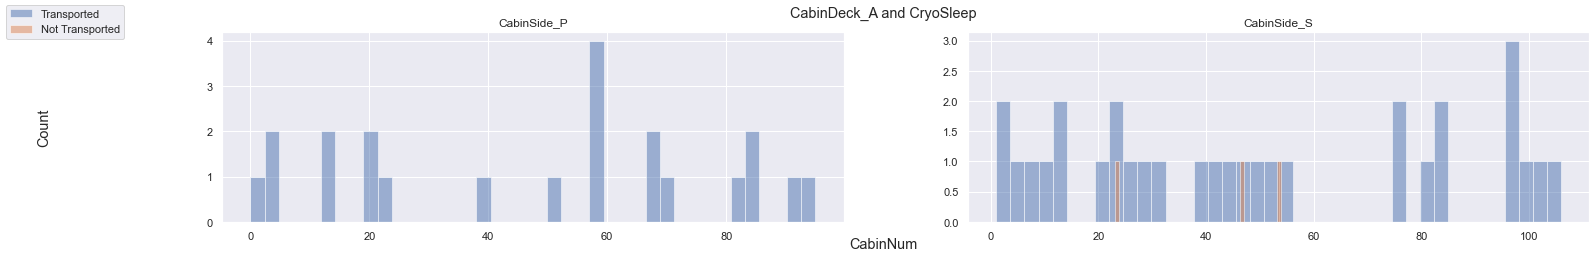

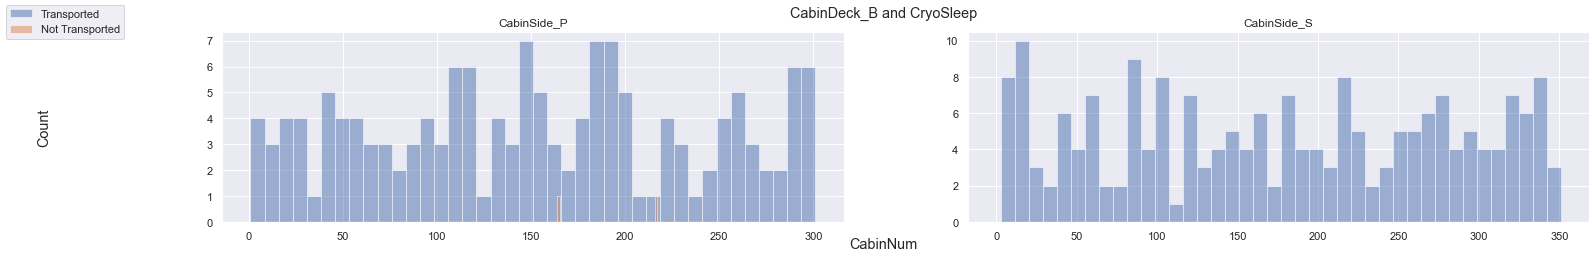

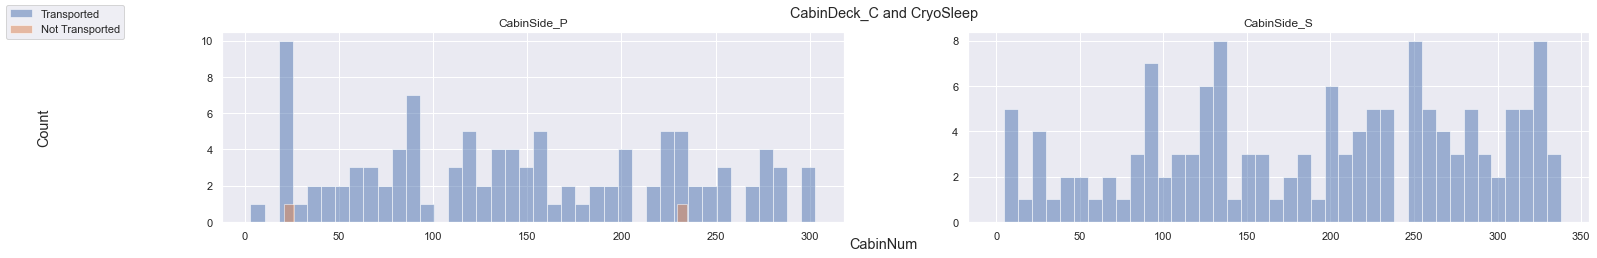

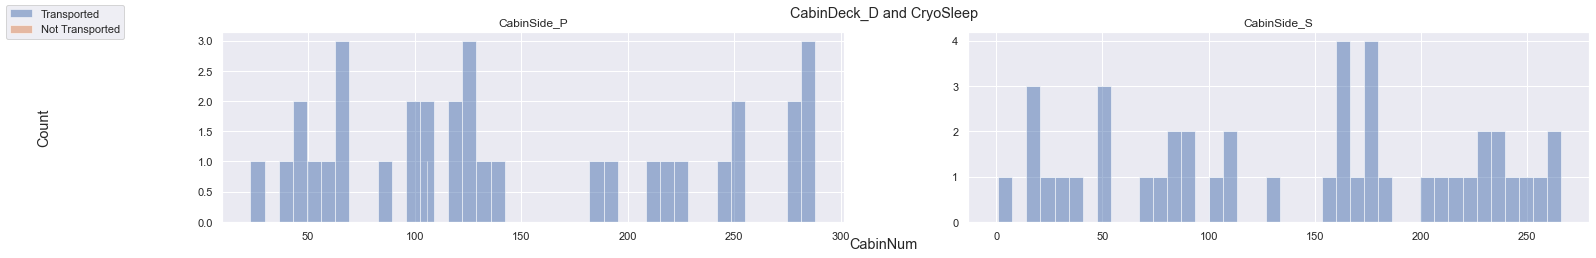

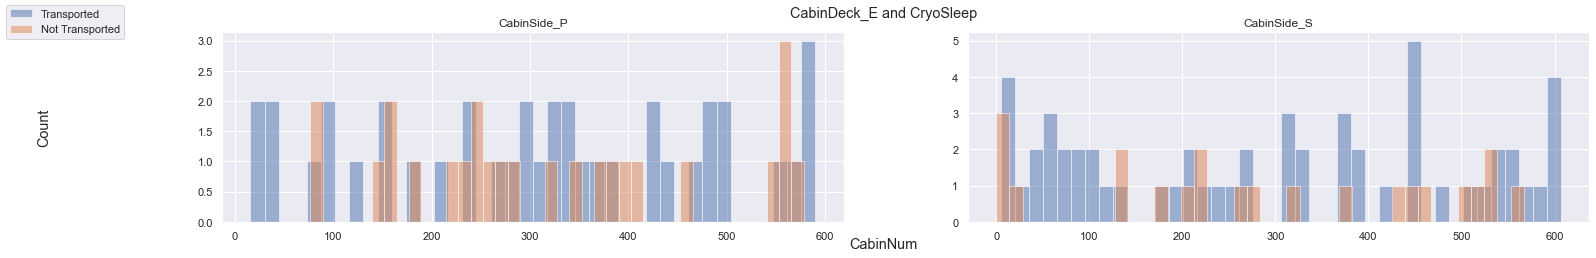

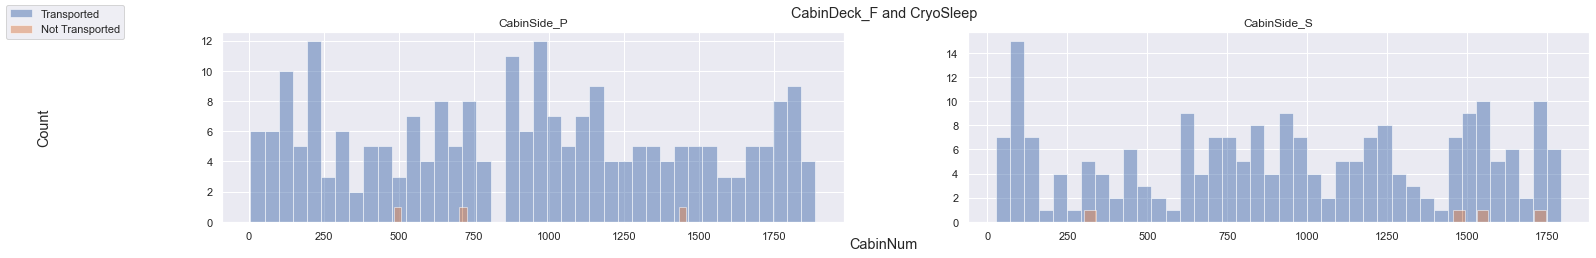

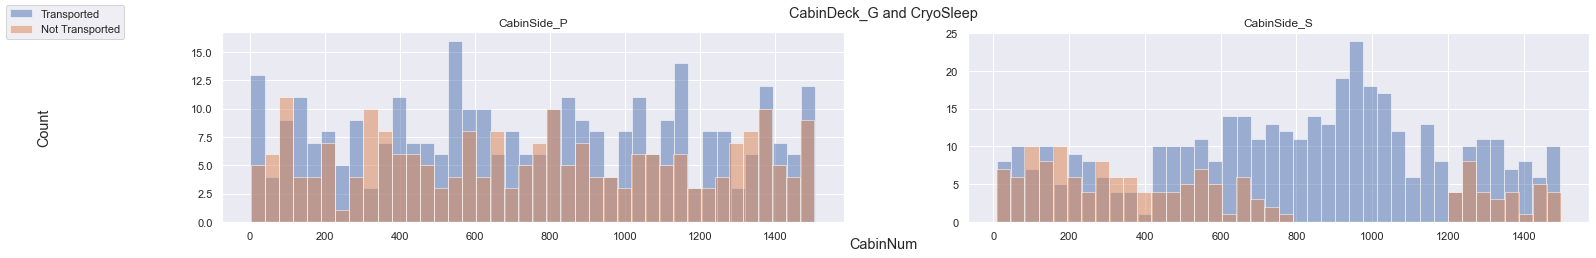

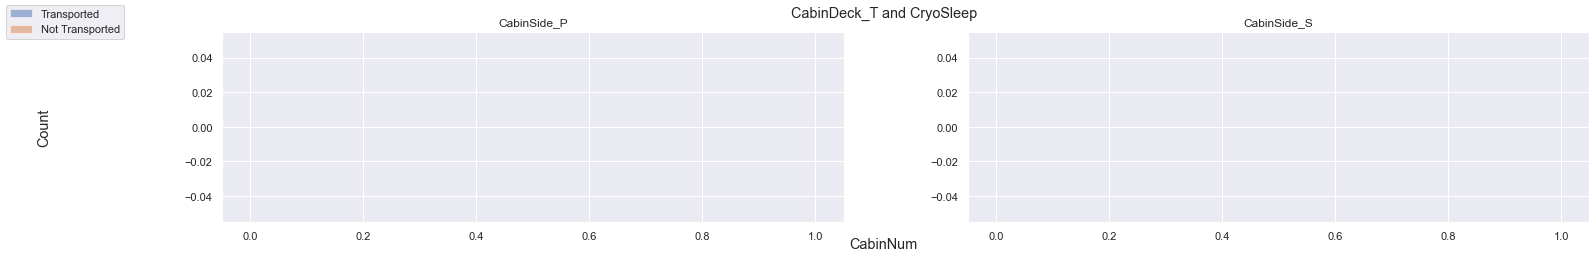

In [111]:
deck_cols = ['CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T']  

a=.5
bins=40
for deck in deck_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24.5, 3.5)
    fig.suptitle(deck + ' and CryoSleep')
    
    ax1.hist(df.CabinNum[(df[deck]==1) & (df['CabinSide_P']==1) & (df['Transported']==1) & (df['CryoSleep']==1)], alpha=a, bins=bins, label='Transported')
    ax1.hist(df.CabinNum[(df[deck]==1) & (df['CabinSide_P']==1) & (df['Transported']==0) & (df['CryoSleep']==1)], alpha=a, bins=bins, label='Not Transported')
    ax1.title.set_text('CabinSide_P')
    ax2.hist(df.CabinNum[(df[deck]==1) & (df['CabinSide_S']==1) & (df['Transported']==1) & (df['CryoSleep']==1)], alpha=a, bins=bins)
    ax2.hist(df.CabinNum[(df[deck]==1) & (df['CabinSide_S']==1) & (df['Transported']==0) & (df['CryoSleep']==1)], alpha=a, bins=bins)
    ax2.title.set_text('CabinSide_S')

    fig.supxlabel('CabinNum')
    fig.supylabel('Count')
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    plt.show()

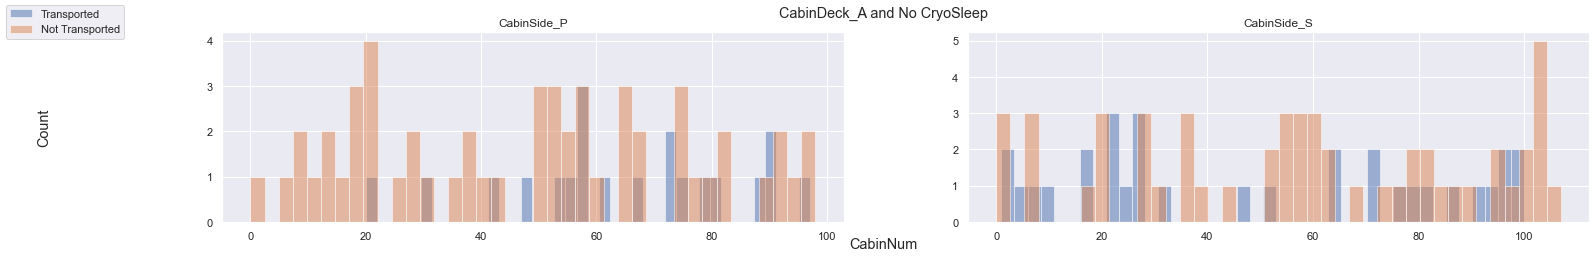

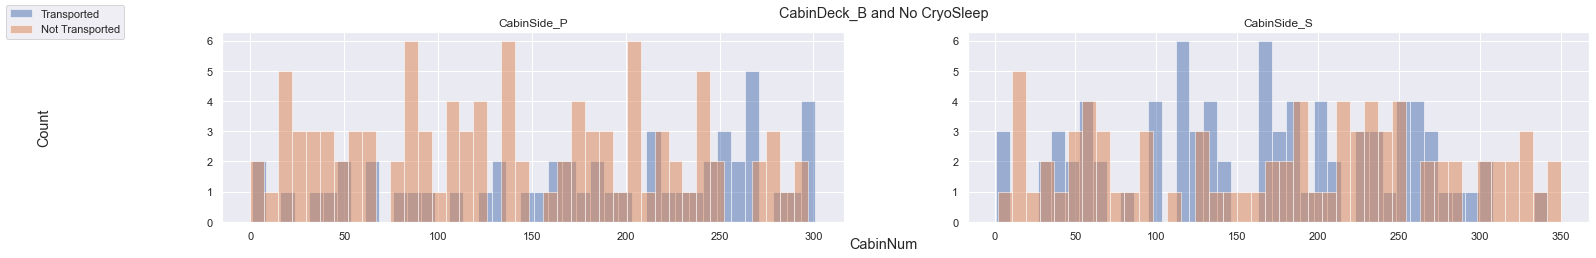

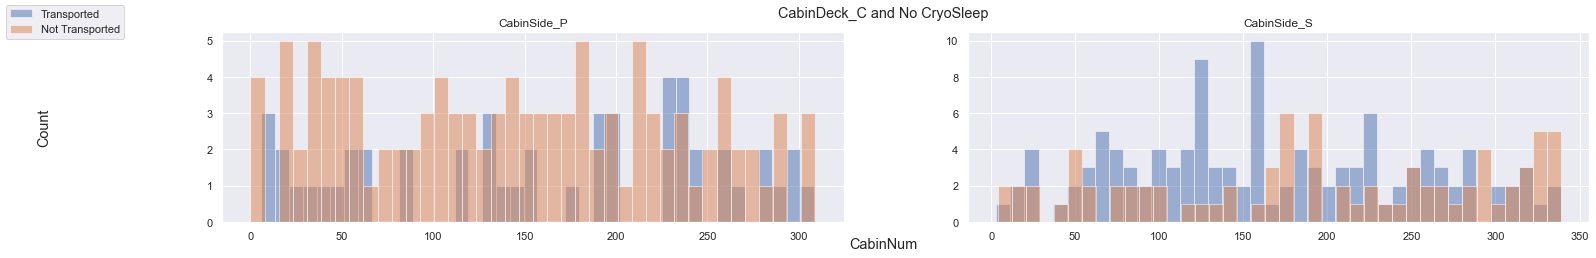

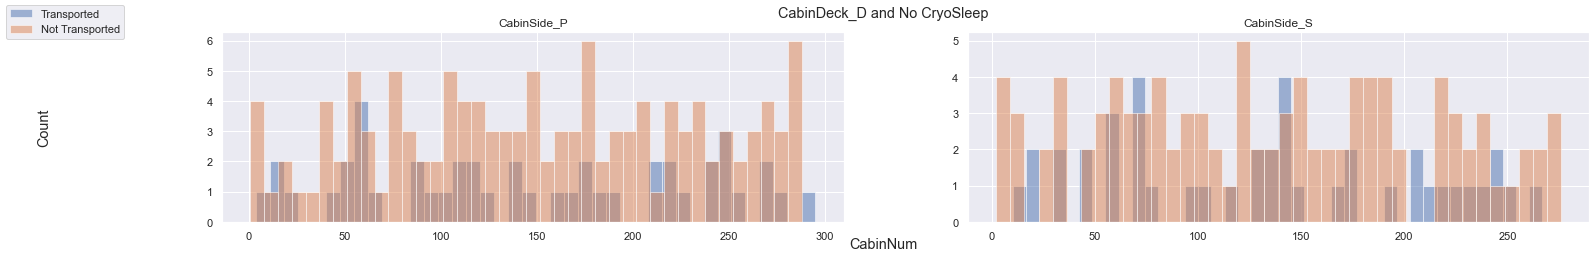

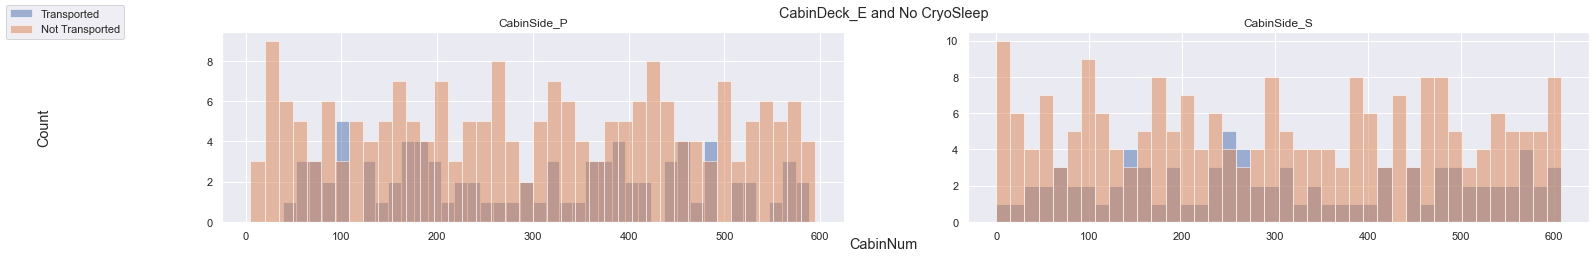

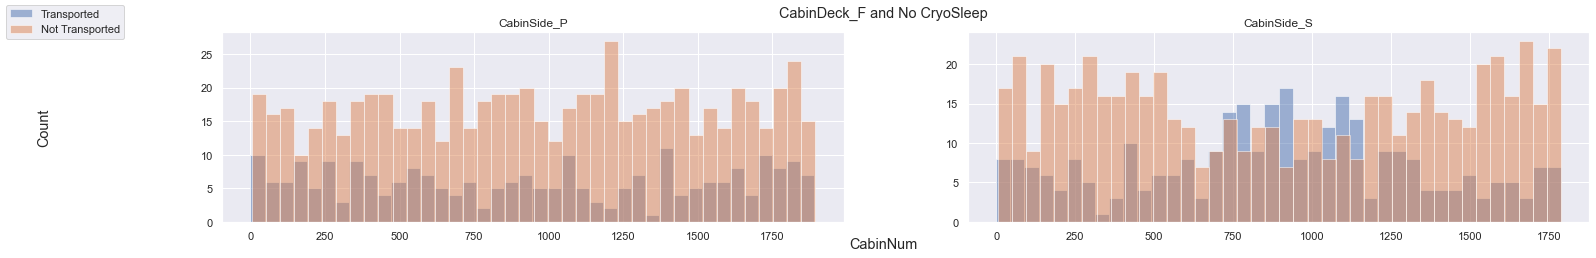

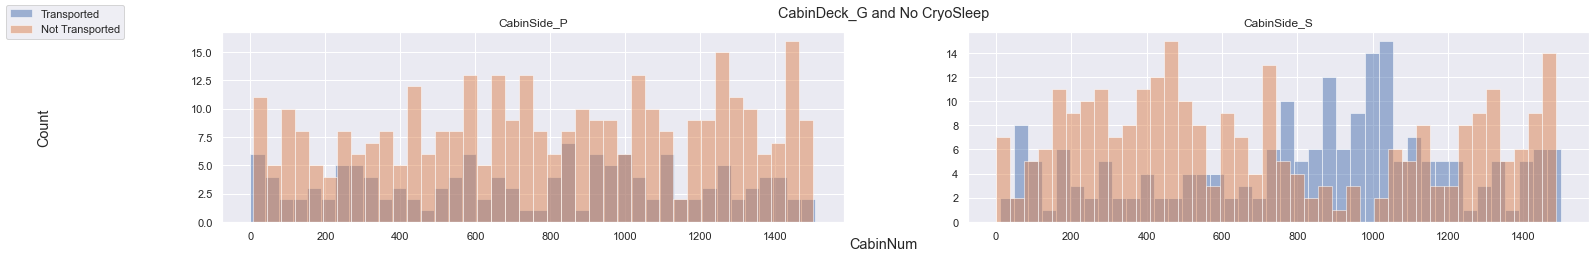

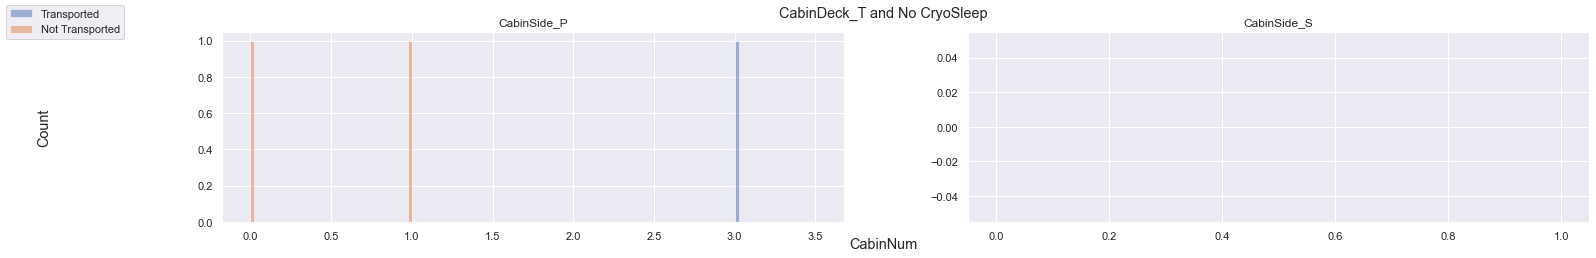

In [112]:
for deck in deck_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24.5, 3.5)
    fig.suptitle(deck + ' and No CryoSleep')
    
    ax1.hist(df.CabinNum[(df[deck]==1) & (df['CabinSide_P']==1) & (df['Transported']==1) & (df['CryoSleep']==0)], alpha=a, bins=bins, label='Transported')
    ax1.hist(df.CabinNum[(df[deck]==1) & (df['CabinSide_P']==1) & (df['Transported']==0) & (df['CryoSleep']==0)], alpha=a, bins=bins, label='Not Transported')
    ax1.title.set_text('CabinSide_P')
    ax2.hist(df.CabinNum[(df[deck]==1) & (df['CabinSide_S']==1) & (df['Transported']==1) & (df['CryoSleep']==0)], alpha=a, bins=bins)
    ax2.hist(df.CabinNum[(df[deck]==1) & (df['CabinSide_S']==1) & (df['Transported']==0) & (df['CryoSleep']==0)], alpha=a, bins=bins)
    ax2.title.set_text('CabinSide_S')

    fig.supxlabel('CabinNum')
    fig.supylabel('Count')
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    plt.show()